정규화(Regularized) 선형회귀란 과적합이 발생하는 경우에 회귀계수(weight)값이 과도하게 커지는 현상을이 발생하는데 이를 막기 위해 회귀 계수의 크기를 제한하는 방법이다.

# Ridge 회귀

Ridge 회귀모형은 RSS(잔차제곱합)을 가장 작게 하는 조건에 가중치의 제곱합을 최소화하는 제약조건이 추가된다.

$$w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M w_j^2 \right)$$

# Lasso 회귀

Lasso 회귀모형은 가중치의 제곱이 아닌 절댓값의 합을 최소화하는 제약조건이 추가된다.

$$w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M | w_j | \right)$$

# Elastic Net 회귀

Elastic Net 회귀모형은 가중치의 절댓값의 합, 제곱합을 동시에 제약조건으로 하며 Ridge와 Lasso를 모두 제약조건으로 갖는 회귀모형이다.

$$w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda_1 \sum_{j=1}^M | w_j | + \lambda_2 \sum_{j=1}^M w_j^2 \right)$$

# statsmodels의 정규화 회귀모형

In [2]:
import statsmodels.api as sm

def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)


X, y = make_nonlinear()
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

비선형 데이터를 생성하고 이를 회귀분석하기 위한 다항식을 이용한다.

In [3]:
model = sm.OLS.from_formula(
    "y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)", data=df)
result1 = model.fit()
result1.params

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141683
I(x ** 3)     3866.723114
I(x ** 4)   -18340.939663
I(x ** 5)    49326.072543
I(x ** 6)   -78884.743070
I(x ** 7)    74538.645149
I(x ** 8)   -38453.132189
I(x ** 9)     8350.254985
dtype: float64

회귀분석 결과 다음과 같이 예측한 회귀선이 부드러운 곡선의 모양을 띄지 않고 일부 데이터에 과도하게 fit한 모습을 확인할 수 있다.

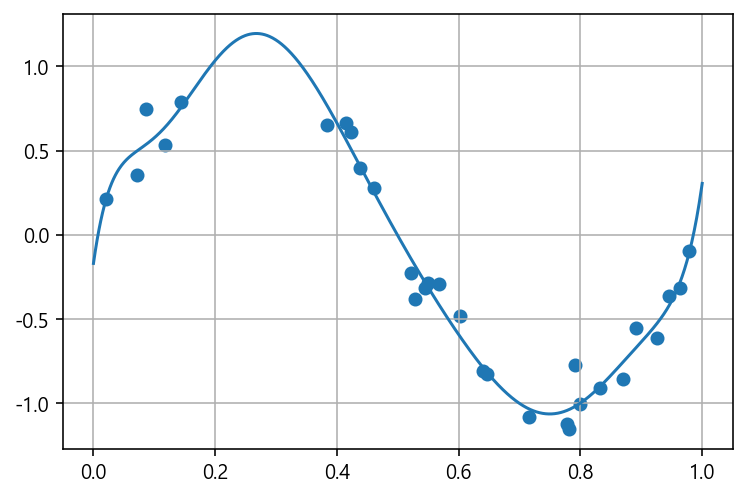

In [5]:
def plot_statsmodels(result):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    dfxx = pd.DataFrame(xx, columns=["x"])
    dfxx = sm.add_constant(dfxx)
    plt.plot(xx, result.predict(dfxx).values)
    plt.grid()
    plt.show()


plot_statsmodels(result1)

statsmodels에서는 fit_regularized() 메소드를 이용해 정규화 선형회귀를 수행할 수 있는데 파라미터값으로 L1_wt를 0으로 지정하면 Ridge 모형이 된다.

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


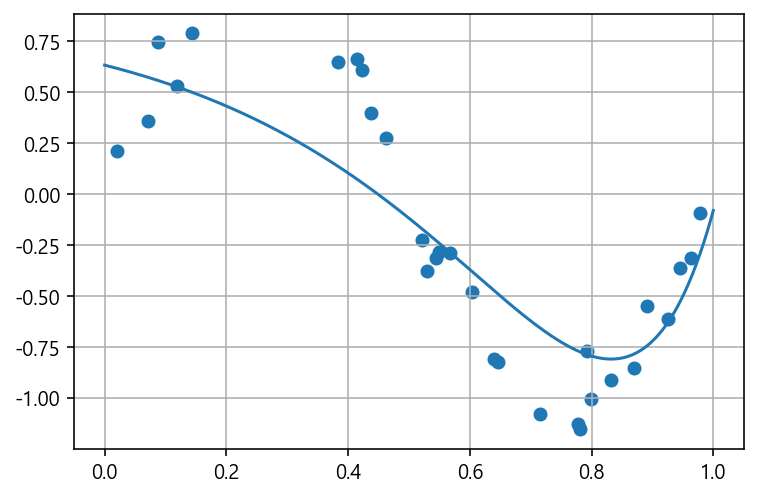

In [6]:
result2 = model.fit_regularized(alpha=0.01, L1_wt=0)
print(result2.params)
plot_statsmodels(result2)

반대로 L1_wt를 1로 지정하면 Lasso 모형이 된다.

Intercept    0.687949
x           -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64


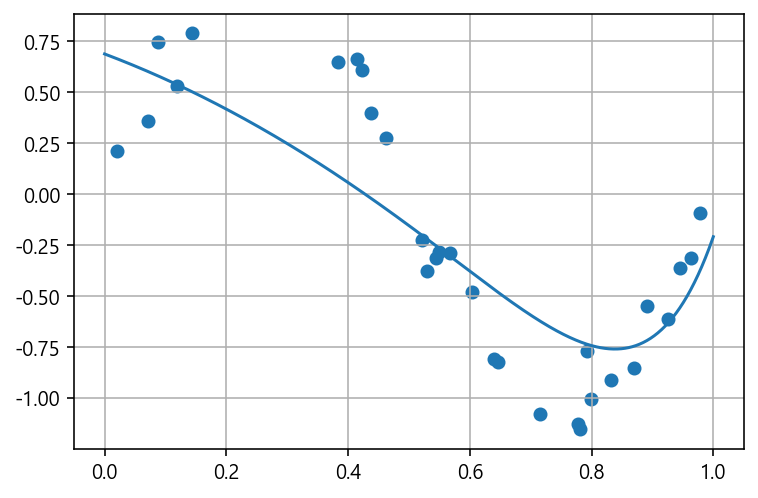

In [7]:
result3 = model.fit_regularized(alpha=0.01, L1_wt=1)
print(result3.params)
plot_statsmodels(result3)

파라미터값을 0과 1사이의 값으로 지정하면 두 모델을 합친 Elastic Net 모형이 된다.

Intercept    0.656203
x           -0.849745
I(x ** 2)   -1.262902
I(x ** 3)   -0.425687
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.304049
I(x ** 8)    0.631908
I(x ** 9)    0.801206
dtype: float64


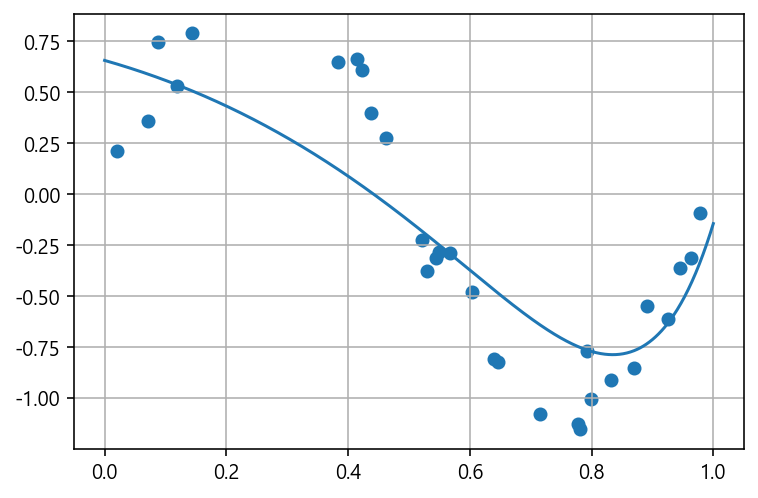

In [8]:
result4 = model.fit_regularized(alpha=0.01, L1_wt=0.5)
print(result4.params)
plot_statsmodels(result4)

실제로 세 정규화 선형회귀 결과를 확인해보면 규제를 통해 일부 데이터에 과도하게 fit하지 않고 전체적으로 일반화된 안정적인 부드러운 회귀선에 생성된 것을 확인할 수 있다. 


이처럼 정규화 선형회귀는 안정적인 예측선을 예측한다는 점에서 장점을 가진다.

즉, 회귀분석에 사용된 데이터가 달라지더라도 계수값이 크게 달라지지 않는다.

# Ridge와 Lasso의 차이

Ridge와 Lasso 모델의 계수값을 확인해보면 다음과 같다.

Ridge 모형의 경우 계수값이 전체적으로 매우 작아진 것을 확인할 수 있다.

In [9]:
print(result2.params)

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


하지만 Lasso 모형의 경우 일부 계수값들이 0으로 바뀐것을 확인할 수 있다.

In [10]:
print(result3.params)

Intercept    0.687949
x           -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64


실제 당뇨병 데이터인 diabetes를 이용해 Lidge, Lasso 회귀를 진행하고 파라미터 값에 따른 계수값들을 확인한 결과는 다음과 같다.

In [11]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

Ridge 회귀의 경우 하이퍼파라미터를 변경해가면서 회귀분석을 진행한 결과 각 독립변수에 대한 계수값이 전체적으로 점점 줄어드는 모습을 확인할 수 있다.

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-9.551414,-7.199457,1.307349,29.465746,19.812822
2,-239.090354,-234.552930,-207.194814,-83.154885,-0.918458
3,520.363367,520.583136,489.691080,306.351627,75.416167
4,323.828627,320.523356,301.769437,201.629434,55.025419
5,-712.328205,-380.607066,-83.466074,5.909369,19.924600
6,413.383794,150.483752,-70.828096,-29.515927,13.948686
7,65.811629,-78.591232,-188.680164,-152.040465,-47.553816
8,167.513774,130.313059,115.712703,117.311715,48.259420
9,720.944468,592.349587,443.814054,262.944995,70.144068


하지만 Lasso회귀의 경우 하이퍼파라미터값이 변경되면서 일부 피처들이 하나 둘 씩 0으로 바뀌는 것을 확인할 수 있다.

In [14]:
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-8.998449,-1.306575,-0.000000,0.000000,0.000000
2,-238.899740,-228.822331,-155.362882,-0.000000,0.000000
3,520.261362,525.560658,517.182017,367.701852,0.000000
4,323.429484,316.175320,275.082351,6.301904,0.000000
5,-720.251734,-307.013677,-52.540269,0.000000,0.000000
6,421.405141,89.321688,-0.000000,0.000000,0.000000
7,66.734168,-105.081398,-210.159753,-0.000000,-0.000000
8,164.448873,119.597989,0.000000,0.000000,0.000000
9,725.340440,571.330871,483.914409,307.605700,0.000000


이처럼 Lasso회귀의 alpha값을 변경해가면서 각 피처에 대한 계수값을 확인할 수 있는데 먼저 0이 되는 피처가 상대적으로 덜 중요한 변수라는 의미이다.

즉, 단일 계수 t-검정을 통해 각 독립변수에 대한 중요도를 확인하는 것과 마찬가지로 Lasso 회귀를 통해서도 독립변수의 중요도를 확인할 수 있다. 아래의 각 alhpa값에 따른 Lasso회귀 결과를 Lasso Path라고도 한다.

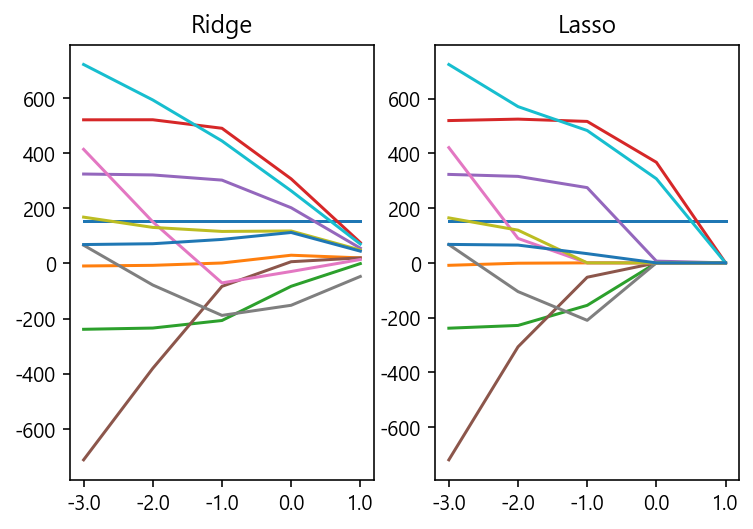

In [15]:
ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Ridge")

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Lasso")

plt.show()